Object Detection

Библиотека ImageAI предоставляет очень удобные и мощные методы для обнаружения объектов на изображениях. Чтобы приступить к обнаружению объектов, необходимо загрузить уже обученные модели обнаружения объектов. Воспользуемся моделью YOLO.

Установим библиотеки конкретных версий, чтобы все заработало :)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
#!pip install -q tensorflow==2.8.0
!git clone https://github.com/dvolchek/YOLOv3-TensorFlow-2.x.git
%cd YOLOv3-TensorFlow-2.x
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

Cloning into 'YOLOv3-TensorFlow-2.x'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 81 (delta 31), reused 23 (delta 1), pack-reused 0
Unpacking objects: 100% (81/81), 42.10 MiB | 5.92 MiB/s, done.
/content/YOLOv3-TensorFlow-2.x
--2023-06-12 10:22:54--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  67.8MB/s    in 3.7s    

2023-06-12 10:22:58 (63.6 MB/s) - ‘model_data/yolov3.weights’ saved [248007048/248007048]



Не забудьте подгрузить файл изображения в сессионное хранилище. Теперь можно выполнять распознование. Выполняем распознавание объектов для изображения с именем 42.jpg. Изображение с распознанными объектами будет сохранено в файле detected.jpg

**NB: Для детектирования людей на последующих изображениях достаточно изменять имена файлов в следующем блоке и запускать его. Весь код сначала выполнять не нужно**



In [ ]:
# 1. по одному обрабатываем фото
import detection_demo
detection_demo.detect('/content/YOLOv3-TensorFlow-2.x/data/img_10.jpg')

1/1 [==============================] - 5s 5s/step


Изображение можно посмотреть в папке проекта, либо вывести на экран в блокноте.

Видно, что на изображении 5 людей. Модель успешно обноружила только троих.

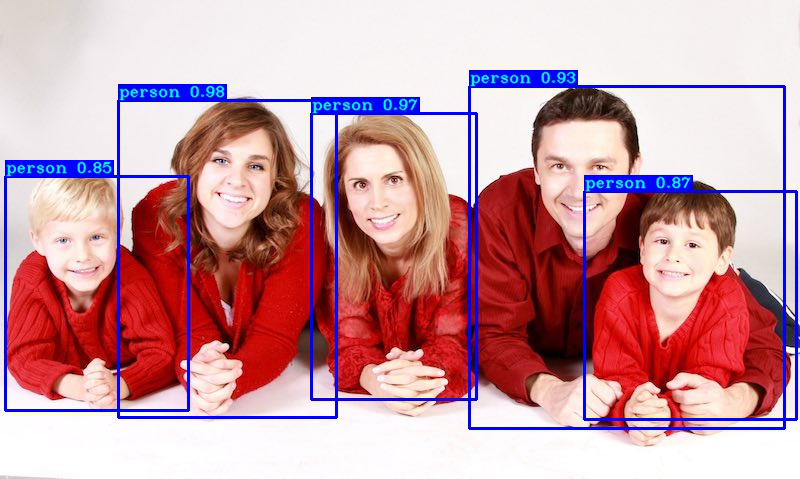

In [ ]:
# 2. Открываем это фото и считаем рамки / кол-во человек в реальности / ошибки
from PIL import Image
image = Image.open('/content/YOLOv3-TensorFlow-2.x/detect.jpg')
image

In [2]:
realno_skolko_chel = 4 + 4 + 4 + 7 + 5 + 5 + 6 + 4 + 4 + 5
TP = 4 + 3 + 3 + 6 + 4 + 3 + 6 + 2 + 4 + 5
TP = 40
FN = 8
FP = 0
TN = 0
print(realno_skolko_chel)
print()
print(TP)
print()
print(FN)

48

40

8


Исходя из данных, мы можем рассчитать точность (precision) и полноту (recall).

Точность (precision) равна TP / (TP + FP). В данном случае FP = 0, что означает, что модель не сделала ни одной ложно-положительной классификации. Таким образом, precision = 1.

Полнота (recall) равна TP / (TP + FN). В данном случае FN = 8, что означает, что модель пропустила 8 истинно-положительных результатов. Таким образом, recall ≈ 0.833.

Для расчета метрики F1 используем формулу: F1 = 2 * (precision * recall) / (precision + recall). В данном случае F1 = 2 * (1 * 0.833) / (1 + 0.833) ≈ 0.909.

Таким образом, точность (precision) равна 1, полнота (recall) равна примерно 0.833, а метрика F1 равна примерно 0.909.